In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
data = sns.load_dataset("penguins")
data = data.dropna()  # remove missing values
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


### Linear Regression

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

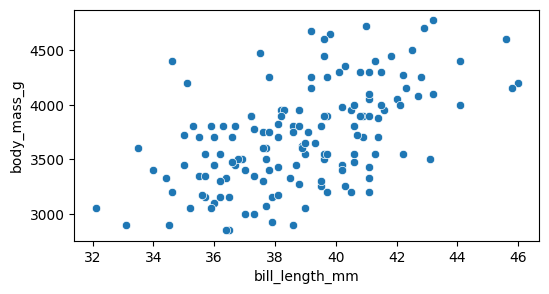

In [15]:
ade = data[data["species"] == "Adelie"]
plt.figure(figsize=(6,3))
sns.scatterplot(data=ade, x="bill_length_mm", y="body_mass_g")

Linear Model:

$$\hat y = aX + b + \epsilon$$

Mean Squared Error (MSE), the L2 norm of the error:

$$MSE = \frac{1}{n} \sum (\hat y - y_{true})^2$$

Mean Absolute Error (MAE), the L1 norm of the error:

$$MAE = \frac{1}{n} \sum |\hat y - y_{true}|$$

In [35]:
from sklearn.linear_model import LinearRegression

m = LinearRegression(fit_intercept=True)
X = ade[["bill_length_mm"]]
y = ade["body_mass_g"]
m.fit(X=X, y=y)
print(f"slope     : {m.coef_[0]:4.1f}   (grams body mass per mm bill length)\n"
      f"intercept : {m.intercept_:4.1f}   (body mass at zero bill length)")

slope     : 93.7   (grams body mass per mm bill length)
intercept : 66.5   (body mass at zero bill length)


In [43]:
from sklearn.metrics import mean_squared_error

ypred = m.predict(X)
f"MSE: {mean_squared_error(y, ypred):8.2f}"

'MSE: 147010.36'

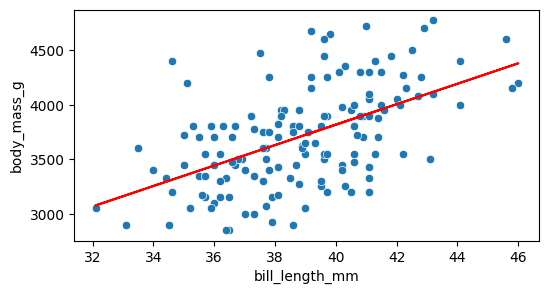

In [45]:
plt.figure(figsize=(6,3))
sns.scatterplot(data=ade, x="bill_length_mm", y="body_mass_g")
plt.plot(X, ypred, "r-")

### Find most similar penguin

Manhattan Distance, L1 norm of the difference

$$dist = \sum _i^k a_i - b_i$$

In [99]:
from sklearn.preprocessing import MinMaxScaler

X = data[["body_mass_g", "flipper_length_mm", "bill_length_mm", "bill_depth_mm"]]
sc = MinMaxScaler()
Xscaled = sc.fit_transform(X)
Xscaled[:3].round(2)

array([[0.29, 0.15, 0.25, 0.67],
       [0.31, 0.24, 0.27, 0.51],
       [0.15, 0.39, 0.3 , 0.58]])

In [100]:
def manhattan_dist(a, b):
    return np.abs(a - b).sum(axis=1)

def euclidean_dist(a, b):
    return np.sqrt(((a - b) ** 2).sum(axis=1))

In [104]:
query = np.array((0.1, 0.5, 0.5, 0.5))

In [105]:
dist = manhattan_dist(Xscaled, query)
closest = dist.argmin()
Xscaled[closest]
data.iloc[closest]

species              Chinstrap
island                   Dream
bill_length_mm            45.5
bill_depth_mm             17.0
flipper_length_mm        196.0
body_mass_g             3500.0
sex                     Female
Name: 195, dtype: object

In [106]:
dist = euclidean_dist(Xscaled, query)
closest = dist.argmin()
Xscaled[closest]
data.iloc[closest]

species              Chinstrap
island                   Dream
bill_length_mm            46.7
bill_depth_mm             17.9
flipper_length_mm        195.0
body_mass_g             3300.0
sex                     Female
Name: 176, dtype: object

### Distance Matrix

In [107]:
dist_matrix = np.vstack([euclidean_dist(a, Xscaled) for a in Xscaled])
dist_matrix.shape

(333, 333)

([], [])

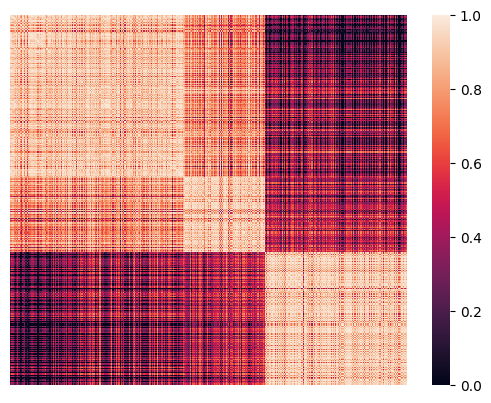

In [108]:
sim_matrix = 1 - dist_matrix
sns.heatmap(sim_matrix, vmin=0.0, vmax=1.0)
plt.xticks([], [])
plt.yticks([], [])

### Clustering

In [109]:
from sklearn.cluster import KMeans

In [123]:
m = KMeans(n_clusters=3).fit(X)
clusters = m.predict(X)
data["cluster"] = clusters.astype(str)

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

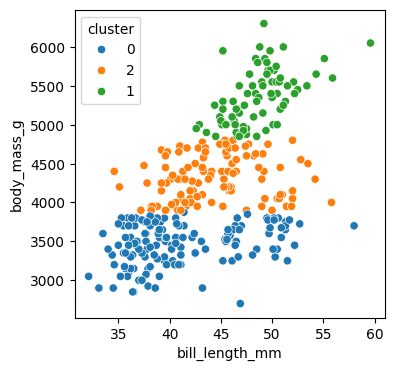

In [124]:
plt.figure(figsize=(4, 4))
sns.scatterplot(data=data, x="bill_length_mm", y="body_mass_g", hue="cluster")

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

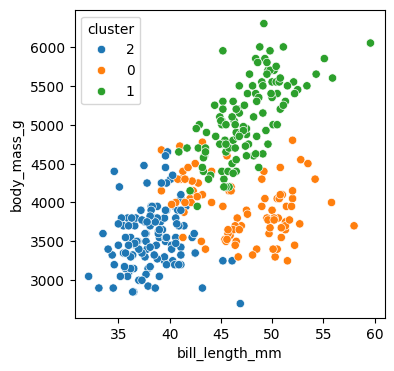

In [127]:
m = KMeans(n_clusters=3).fit(Xscaled)
clusters = m.predict(Xscaled)
data["cluster"] = clusters.astype(str)
plt.figure(figsize=(4, 4))
sns.scatterplot(data=data, x="bill_length_mm", y="body_mass_g", hue="cluster")

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

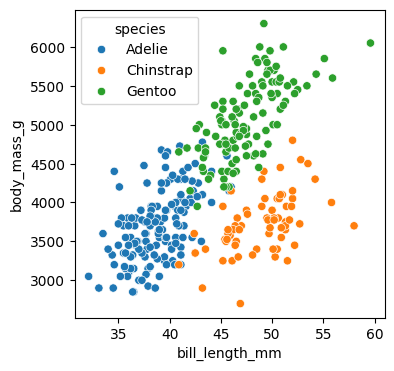

In [121]:
plt.figure(figsize=(4, 4))
sns.scatterplot(data=data, x="bill_length_mm", y="body_mass_g", hue="species")

## Markov Chain

In [46]:
T = np.array([
    [1, 1, 0, 0],
    [1, 1, 1, 0],
    [0, 1, 1, 1],
    [0, 0, 1, 1]
])

In [47]:
np.linalg.det(T)

np.float64(-1.0)

In [48]:
T = (T / T.sum(axis=0)).transpose()
T

array([[0.5       , 0.5       , 0.        , 0.        ],
       [0.33333333, 0.33333333, 0.33333333, 0.        ],
       [0.        , 0.33333333, 0.33333333, 0.33333333],
       [0.        , 0.        , 0.5       , 0.5       ]])

In [49]:
v = np.array([0.25, 0.25, 0.25, 0.25])

In [50]:
for _ in range(1000):
    v = np.dot(v, T)
    v = v / v.sum()

In [51]:
v

array([0.2, 0.3, 0.3, 0.2])

In [54]:
graph = {}
for line in open("countries.txt"):
    a, b = line.strip().split("-")
    graph.setdefault(a, set())
    graph.setdefault(b, set())
    graph[a].add(b)
    graph[b].add(a)
    

<Axes: >

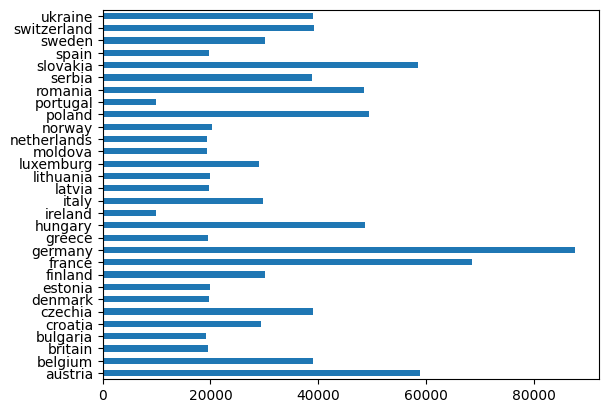

In [82]:
import random

count = {}
x = "finland"
for _ in range(1000_000):
    x = random.choice(list(graph[x]))
    count.setdefault(x, 0)
    count[x] += 1

pd.Series(count).sort_index().plot.barh()

In [69]:
k = len(graph)
index = {a: i for i, a in enumerate(graph)} 
C = np.zeros((k, k))
for a in graph:
    i = index[a]
    C[i][i] = 1
    for b in graph[a]:
        j = index[b]
        C[i][j] = 1
        C[j][i] = 1

T = (C / C.sum(axis=0)).transpose()

In [74]:
v = np.ones(k) / k
for _ in range(10000):
    v = np.dot(v, T)
    v = v / v.sum()

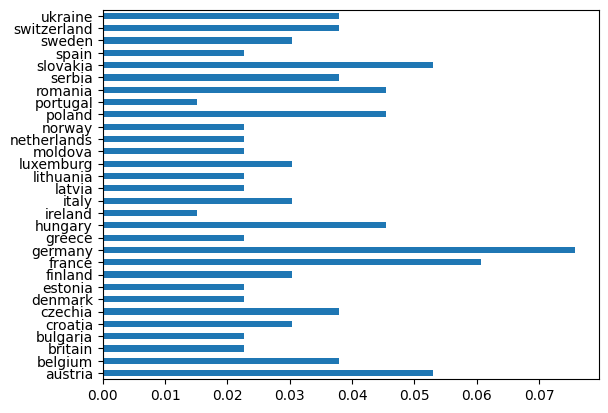

In [83]:
df = pd.Series(v, index=graph.keys()).sort_index().plot.barh()

In [36]:
np.linalg.eig(T)

EigResult(eigenvalues=array([-0.22871355,  0.16666667,  1.        ,  0.72871355]), eigenvectors=array([[ 0.40005801,  0.58834841, -0.5       , -0.64302644],
       [-0.58305539, -0.39223227, -0.5       , -0.29413772],
       [ 0.58305539, -0.39223227, -0.5       ,  0.29413772],
       [-0.40005801,  0.58834841, -0.5       ,  0.64302644]]))